In [ ]:
key = "7389c30bdb4fa74c7d5909d311b5d2dfa45fbd53"

In [ ]:
## Data Collection

import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

<ipython-input-65-6eddcb5f2c35>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key=key)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df1 = df.reset_index()['close']

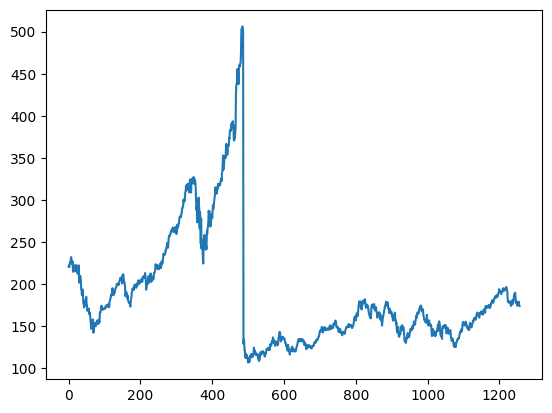

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0       220.79
1       222.19
2       220.42
3       224.95
4       225.74
         ...  
1252    175.01
1253    177.97
1254    179.07
1255    175.49
1256    173.93
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# !pip install numpy scipy scikit-learn


In [ ]:
# df1

In [ ]:
## splitting dataset into train and test split

training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df),:1]

In [ ]:
# training_size + test_size == len(df1)

In [ ]:
import numpy
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]  ### i = 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])

  return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# reshape into x=t, t+1, t+2, t+3 and Y = t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.28541014 0.28891672 0.28448341 ... 0.15864746 0.16020038 0.15924859]
 [0.28891672 0.28448341 0.29582968 ... 0.16020038 0.15924859 0.16052599]
 [0.28448341 0.29582968 0.29780839 ... 0.15924859 0.16052599 0.16328115]
 ...
 [0.10557295 0.10001252 0.09552912 ... 0.181866   0.17257358 0.16904195]
 [0.10001252 0.09552912 0.09718222 ... 0.17257358 0.16904195 0.18149029]
 [0.09552912 0.09718222 0.09773325 ... 0.16904195 0.18149029 0.16385723]]


In [ ]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [ ]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
### Create the Staked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train[:100]

array([[[0.28541014],
        [0.28891672],
        [0.28448341],
        ...,
        [0.15864746],
        [0.16020038],
        [0.15924859]],

       [[0.28891672],
        [0.28448341],
        [0.29582968],
        ...,
        [0.16020038],
        [0.15924859],
        [0.16052599]],

       [[0.28448341],
        [0.29582968],
        [0.29780839],
        ...,
        [0.15924859],
        [0.16052599],
        [0.16328115]],

       ...,

       [[0.15864746],
        [0.16020038],
        [0.15924859],
        ...,
        [0.24438322],
        [0.24393237],
        [0.2333876 ]],

       [[0.16020038],
        [0.15924859],
        [0.16052599],
        ...,
        [0.24393237],
        [0.2333876 ],
        [0.23644333]],

       [[0.15924859],
        [0.16052599],
        [0.16328115],
        ...,
        [0.2333876 ],
        [0.23644333],
        [0.24142768]]])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 25s 946ms/step - loss: 0.0355 - val_loss: 7.9273e-04
Epoch 2/100
12/12 [==============================] - 6s 473ms/step - loss: 0.0143 - val_loss: 0.0027
Epoch 3/100
12/12 [==============================] - 7s 586ms/step - loss: 0.0101 - val_loss: 4.0563e-04
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0103 - val_loss: 9.4924e-04
Epoch 5/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0084 - val_loss: 5.6675e-04
Epoch 6/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0081 - val_loss: 3.5948e-04
Epoch 7/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0057 - val_loss: 2.9761e-04
Epoch 9/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0055 - val_loss: 3.5902e-04
Epoch 10/100
12/12 [==============================] - 2s 181ms

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
### Lets Do the prediction and check performance metrices

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 34ms/step


In [ ]:
## Trasformback to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



In [ ]:
### Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.04569260090693

In [ ]:
### Test Date RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

159.0190012755494

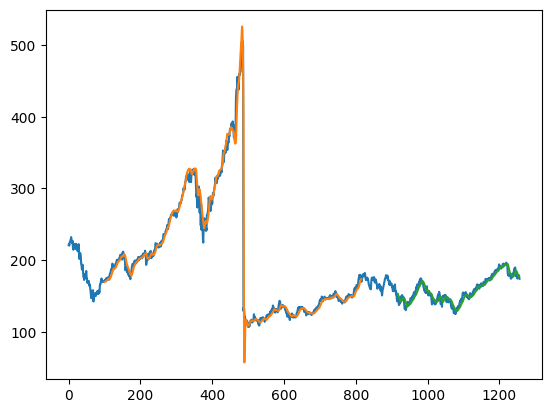

In [ ]:
### Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+ 1:len(df1)- 1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

440

In [ ]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
len(temp_input)

100

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

  if(len(temp_input) > 100):
    #print(temp_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(temp_input)
    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)

[0.1753563]
101
1 day input [0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

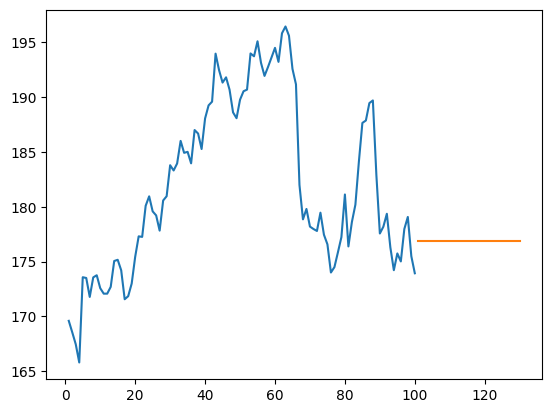

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

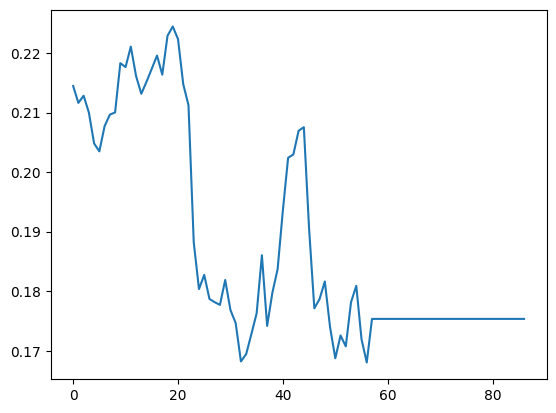

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])